**Training and Pruning Neural Network on Tensorflow **

**Importing the libraries and packages**

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pickle
from tensorflow.python.framework import ops
import time
%matplotlib inline

**Reading datasets**

In [2]:
train_dataset = pd.read_csv("../input/train.csv")
test_dataset = pd.read_csv("../input/test.csv")

**Analyzing entries of train and test data**

In [3]:
train_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
test_dataset.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Histogram of labels and their counts**

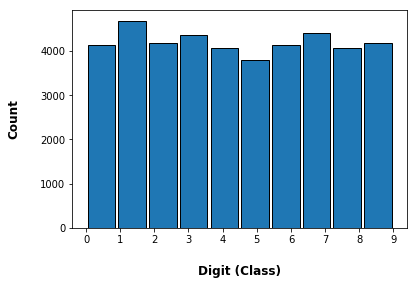

In [5]:
ax = train_dataset.label.hist(ec='black', grid=False, rwidth=0.9, zorder=5)
ax.set_xlabel("Digit (Class)", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Count", labelpad=20, weight='bold', size=12)
ax.set_xticks(range(10));

As can be seen from histogram, labels are almost uniformly sampled

**Reading from train and test DataFrames into numpy arrays**

In [6]:
X = train_dataset.iloc[:, 1:].values
y = train_dataset.iloc[:, 0].values
X_test = test_dataset.values

**Creating training and validation sets from train_dataset**

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

**Determining the shapes of input, validation and test data**

In [8]:
print("X_train.shape : ", X_train.shape)
print("X_val.shape : ", X_val.shape)
print("X_test.shape : ", X_test.shape)

print("y_train.shape : ", y_train.shape)
print("y_val.shape : ", y_val.shape)


X_train.shape :  (33600, 784)
X_val.shape :  (8400, 784)
X_test.shape :  (28000, 784)
y_train.shape :  (33600,)
y_val.shape :  (8400,)


**Data Preprocessing : One-Hot-Encoding of labels**

In [9]:
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
one_hot = OneHotEncoder(categories='auto')
y_train = one_hot.fit_transform(y_train).toarray()
y_val = one_hot.transform(y_val).toarray()

**Data Preprocessing : Rearranging into required shapes and Scaling**

In [10]:
# 'X' shape : [no of features, no of samples]
X_train = X_train.T
X_val = X_val.T
X_test = X_test.T

y_train = y_train.T
y_val = y_val.T

X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

**Verifying the correctness of shapes of input, validation and test data**

In [11]:
# 'X's have a shape [no of features, no of samples],  'y's have a shape [no of classes, no of samples]
print("X_train.shape : ", X_train.shape)
print("X_val.shape : ", X_val.shape)
print("X_test.shape : ", X_test.shape)

print("y_train.shape : ", y_train.shape)
print("y_val.shape : ", y_val.shape)

X_train.shape :  (784, 33600)
X_val.shape :  (784, 8400)
X_test.shape :  (784, 28000)
y_train.shape :  (10, 33600)
y_val.shape :  (10, 8400)


**A function to initialize parameters of the model**

In [12]:
def initialize_parameters():
    """Returns parameters -- a dictionary of tensors containing W1, W2, W3, W4, W5
        weights in 'W's are arranged in shape [no of units, no of input features] i.e.
        weights associated with a neuron are arranged in ROWS"""    
    W1 = tf.get_variable("W1",[1000, 784],initializer = tf.contrib.layers.xavier_initializer(seed=1))
    W2 = tf.get_variable("W2",[1000,1000],initializer = tf.contrib.layers.xavier_initializer(seed=1))
    W3 = tf.get_variable("W3",[500,1000],initializer = tf.contrib.layers.xavier_initializer(seed=1))
    W4 = tf.get_variable("W4",[200,500],initializer = tf.contrib.layers.xavier_initializer(seed=1))
    W5 = tf.get_variable("W5",[10,200],initializer = tf.contrib.layers.xavier_initializer(seed=1))
    
    parameters = {"W1": W1,
                  "W2": W2,
                  "W3": W3,
                  "W4": W4,
                  "W5": W5}
    return parameters
     

**A function to perform forward propagation**

In [13]:
def forward_propagation(X, parameters, dropout=False):    
    """Returns Z5 -> output logits of forward propagation"""    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    W5 = parameters['W5']
    
    # Dropouts     
    D1 = np.random.rand(W1.shape[0], 1) 
    D1 = D1>0.5
    D2 = np.random.rand(W2.shape[0], 1)
    D2 = D2>0.4
    D3 = np.random.rand(W3.shape[0], 1)
    D3 = D3>0.3
    D4 = np.random.rand(W4.shape[0], 1)
    D4 = D4>0.3
       
    Z1 = tf.matmul(W1,X)                                            
    A1 = tf.nn.relu(Z1)
    if dropout==True :
        A1 = A1*D1
    
    Z2 = tf.matmul(W2,A1)                                       
    A2 = tf.nn.relu(Z2) 
    if dropout==True :
        A2 = A2*D2
    
    Z3 = tf.matmul(W3,A2)
    A3 = tf.nn.relu(Z3)
    if dropout==True :
        A3 = A3*D3
    
    Z4 = tf.matmul(W4,A3) 
    A4 = tf.nn.relu(Z4)
    if dropout==True :
        A4 = A4*D4
    
    Z5 = tf.matmul(W5,A4) 
    
    return Z5

**Function to compute loss using the logits and labels**

In [14]:
def compute_cost(logits, labels, parameters, Lambda, batch_size):
    """  Returns cost - Tensor of the cost function   """    
    # Retrieve the parameters from the dictionary "parameters"  only when L2_Regularization_cost added
    """W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    W5 = parameters['W5']"""
      
    logits = tf.transpose(logits)
    labels = tf.transpose(labels)

    cross_entropy_cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    cost = cross_entropy_cost
    #L2_Regularization_cost = tf.reduce_sum(tf.square(W1)) + tf.reduce_sum(tf.square(W2)) + tf.reduce_sum(tf.square(W3)) + tf.reduce_sum(tf.square(W4))+ tf.reduce_sum(tf.square(W5))
    #L2_Regularization_cost = L2_Regularization_cost*Lambda/(2*batch_size)
    #cost += L2_Regularization_cost

    return cost

**Function to create mini-batches randomly from the input batch**

In [15]:
def random_mini_batches(X, y, minibatch_size = 64, seed = 0):    
    """ Returns mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y) """    
    m = X.shape[1]                  # number of training examples
    minibatches = []
    np.random.seed(seed)
    
    # Shuffling (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_y = y[:, permutation].reshape((y.shape[0],m))

    # Partition (shuffled_X, shuffled_Y). Last non-uniform size batch is handled separately
    num_complete_minibatches = int(m/minibatch_size) 
    for k in range(0, num_complete_minibatches):
        minibatch_X = shuffled_X[:, k * minibatch_size : k * minibatch_size + minibatch_size]
        minibatch_y = shuffled_y[:, k * minibatch_size : k * minibatch_size + minibatch_size]
        minibatch = (minibatch_X, minibatch_y)
        minibatches.append(minibatch)
    
    # Handling the end case (last minibatch < minibatch_size)
    if m % minibatch_size != 0:
        minibatch_X = shuffled_X[:, num_complete_minibatches * minibatch_size : m]
        minibatch_y = shuffled_y[:, num_complete_minibatches * minibatch_size : m]
        minibatch = (minibatch_X, minibatch_y)
        minibatches.append(minibatch)
    
    return minibatches

**Function that creates a Neural Network model**

In [16]:
def model(X_train, y_train, X_val, y_val, learning_rate = 0.0001, num_epochs = 1500, minibatch_size = 32, Lambda=0.7, print_cost = True):
    """ Returns parameters -> parameters learnt by the model """    
    ops.reset_default_graph()                         
    tf.set_random_seed(1)                             
    seed = 3                                          
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Placeholders for inputs during training step
    X, y = tf.placeholder(tf.float32,[n_x, None]),tf.placeholder(tf.float32,[n_y, None])

    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation
    logits = forward_propagation(tf.cast(X,tf.float32), parameters, dropout=False)
    
    # Loss function
    cost = compute_cost(logits, y, parameters, Lambda, X_train.shape[1])
    
    # Optimizing Strategy
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        
        sess.run(init)
        
        # Training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       
            num_minibatches = int(m / minibatch_size) 
            seed = seed + 1
            minibatches = random_mini_batches(X_train, y_train, minibatch_size, seed)

            for minibatch in minibatches:
                (minibatch_X, minibatch_y) = minibatch
                
                _ , minibatch_cost = sess.run([optimizer,cost], feed_dict={X: minibatch_X, y: minibatch_y})   
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every 10 epoch
            if print_cost == True and epoch % 10 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # Plotting the costs
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.legend('training cost')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        parameters = sess.run(parameters)
        print ("Model has been trained!")

        # Calculating Accuracies
        pred_logits = forward_propagation(X, parameters)
        correct_prediction = tf.equal(tf.argmax(pred_logits), tf.argmax(y))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, y: y_train}))
        print ("Validation Accuracy:", accuracy.eval({X: X_val, y: y_val}))
        
        return parameters

**Training the model and obtaining the parameters**


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Cost after epoch 0: 0.267102
Cost after epoch 10: 0.021110
Cost after epoch 20: 0.007277
Cost after epoch 30: 0.007599
Cost after epoch 40: 0.004800
Cost after epoch 50: 0.004947
Cost after epoch 60: 0.000000
Cost after epoch 70: 0.000000
Cost after epoch 80: 0.000000
Cost after epoch 90: 0.000000


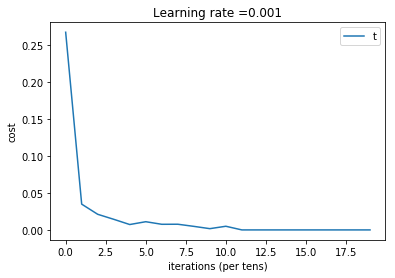

Model has been trained!
Train Accuracy: 1.0
Validation Accuracy: 0.9816667


In [17]:
parameters = model(X_train, y_train, X_val, y_val,learning_rate=0.001, Lambda=0.05, minibatch_size=128, num_epochs=100)

**Function for obtaining predictions using the trained model**

In [18]:
def predict(X_test, parameters):
    """Returns y_pred --> List of predictions on X_test by the model"""
    start_time = time.time()
    
    logits = forward_propagation(tf.cast(X_test, tf.float32), parameters)
    y_pred = tf.argmax(logits)
    with tf.Session() as sess:
        y_pred = sess.run(y_pred)
    
    end_time = time.time()
    print("Time taken to predict :  ", end_time-start_time, "s")
    return y_pred

In [19]:
# Predictions
y_pred = predict(X_test, parameters)

Time taken to predict :   5.106185436248779 s


**A sample image for prediction**

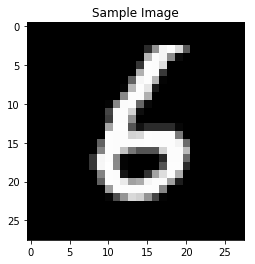

Prediction :  6


In [20]:
plt.imshow(X_test[:,92].reshape(28,28),cmap='gray')
plt.title("Sample Image")
plt.show()
print("Prediction : ", y_pred[92])

**Saving the trained model using pickle**

In [21]:
with open("NN_Parameters.pickle", "wb") as f:
    pickle.dump(parameters, f)

**Loading the pre-trained model from pickle file**

In [22]:
with open("NN_Parameters.pickle", "rb") as f:
    parameters=pickle.load(f)

The two common strategies for pruning a neural network are :

**1. Weight Pruning : ** where weights of individual layers are set to zero as per their absolute value

**2. Unit Pruning : ** where all the weights associated with a neuron are set to zero as per their L2-Norm

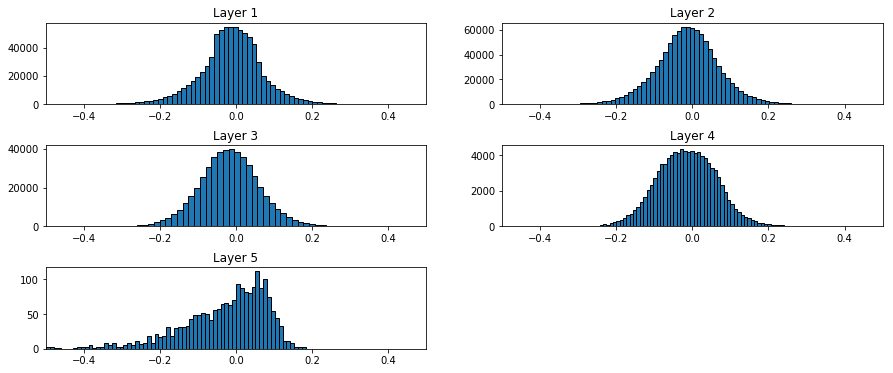

In [23]:
# Plotting histogram of each layer's weights (for weight pruning)
plt.figure(1, figsize=(15,6))
plt.subplots_adjust(hspace=0.5)
i=0
for W in parameters.values():
    plt.subplot(3,2,i+1)
    plt.title("Layer {}".format(i+1))
    i=i+1
    plt.hist(W.reshape(-1,1), bins=100, ec="black")
    plt.xlim(-0.5, 0.5)

Histogram of values contained in  weight matrices of each layer

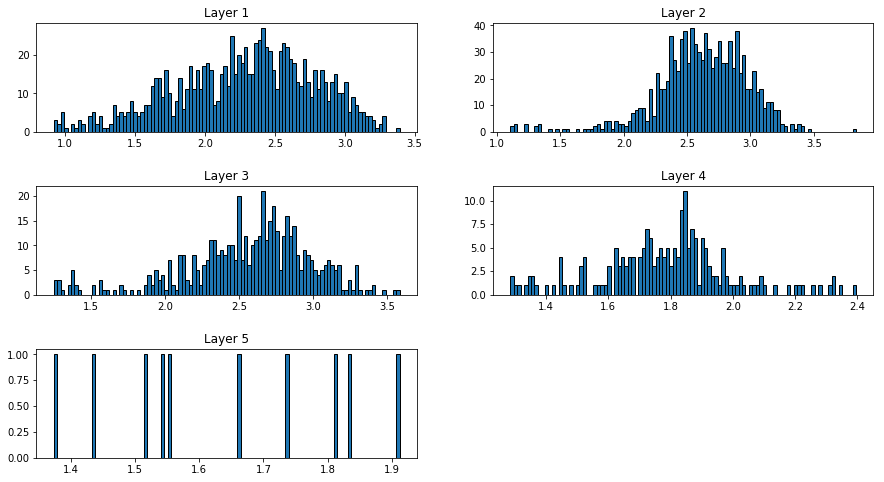

In [24]:
# Plotting histogram of each layer's coloumn norms (for unit pruning)
plt.figure(2, figsize=(15,8))
plt.subplots_adjust(hspace=0.5)
i=0
for W in parameters.values():
    norms = np.linalg.norm(W, ord=2, axis=1)
    plt.subplot(3,2,i+1)
    plt.title("Layer {}".format(i+1))
    i=i+1
    plt.hist(norms, bins=100, ec="black")

Histogram of L2-Norms of **rows** of each layer

**Function for weight pruning the network**

In [25]:
def weight_pruning_accuracy(k, X_val, y_val, parameters):
    """Returns parameters_new, accuracy --> pruned parameters of each layer and accuracy obtained with those parameters"""
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    W5 = parameters["W5"]
    
    n_x = W1.shape[1]
    n_y = W5.shape[0]
    
    W1 = W1*(np.abs(W1)>np.percentile(np.abs(W1),k))
    W2 = W2*(np.abs(W2)>np.percentile(np.abs(W2),k))
    W3 = W3*(np.abs(W3)>np.percentile(np.abs(W3),k))
    W4 = W4*(np.abs(W4)>np.percentile(np.abs(W4),k))
    
    parameters_new = {}
    parameters_new['W1'] = W1
    parameters_new['W2'] = W2
    parameters_new['W3'] = W3
    parameters_new['W4'] = W4
    parameters_new['W5'] = W5    
    
    # Building the graph
    X, Y = tf.placeholder(tf.float32,[n_x, None]),tf.placeholder(tf.float32,[n_y, None])
    
    Z5 = forward_propagation(X, parameters_new)
    correct_prediction = tf.equal(tf.argmax(Z5), tf.argmax(Y))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    with tf.Session() as sess:
        accuracy = sess.run(accuracy,feed_dict={X:X_val, Y:y_val})
        print("% Sparsity :  ",k,"    |    Accuracy",accuracy)
    return parameters_new, accuracy

**Evaluating weight pruning with different sparsity levels**

In [26]:
sparsity_percentage = [0, 25, 50, 60, 70, 80, 90, 95, 97, 99]
weight_pruning_acc = []
for k in sparsity_percentage:
    _ , acc = weight_pruning_accuracy(k, X_val, y_val, parameters)
    weight_pruning_acc.append(acc)

% Sparsity :   0     |    Accuracy 0.9816667
% Sparsity :   25     |    Accuracy 0.9817857
% Sparsity :   50     |    Accuracy 0.9816667
% Sparsity :   60     |    Accuracy 0.98059523
% Sparsity :   70     |    Accuracy 0.98
% Sparsity :   80     |    Accuracy 0.9735714
% Sparsity :   90     |    Accuracy 0.8375
% Sparsity :   95     |    Accuracy 0.23857144
% Sparsity :   97     |    Accuracy 0.117380954
% Sparsity :   99     |    Accuracy 0.12404762


**Selecting 75% as sparsity level for weight pruning**

In [27]:
weight_pruned_parameters, acc = weight_pruning_accuracy(75, X_val, y_val, parameters)
y_pred_new = predict(X_test, weight_pruned_parameters)

% Sparsity :   75     |    Accuracy 0.97964287
Time taken to predict :   5.0829548835754395 s


**Function for unit pruning the network**

In [28]:
def unit_pruning_accuracy(k, X_val, y_val, parameters):
    """Returns parameters_new, accuracy --> pruned parameters of each layer and accuracy obtained with those parameters"""
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    W5 = parameters["W5"]
    
    n_x = W1.shape[1]
    n_y = W5.shape[0]
    
    L1 = np.linalg.norm(W1, axis=1)
    L2 = np.linalg.norm(W2, axis=1)
    L3 = np.linalg.norm(W3, axis=1)
    L4 = np.linalg.norm(W4, axis=1)
    
    L1 = np.reshape(L1>np.percentile(L1, k),[-1,1])
    L2 = np.reshape(L2>np.percentile(L2, k),[-1,1])
    L3 = np.reshape(L3>np.percentile(L3, k),[-1,1])
    L4 = np.reshape(L4>np.percentile(L4, k),[-1,1])
    
    L1 = tf.cast(L1, tf.float32)
    L2 = tf.cast(L2, tf.float32)
    L3 = tf.cast(L3, tf.float32)
    L4 = tf.cast(L4, tf.float32)
    
    parameters_new = {}
    parameters_new['W1'] = W1*L1
    parameters_new['W2'] = W2*L2
    parameters_new['W3'] = W3*L3
    parameters_new['W4'] = W4*L4
    parameters_new['W5'] = W5
    
    # Building the graph    
    X, Y = tf.placeholder(tf.float32,[n_x, None]),tf.placeholder(tf.float32,[n_y, None])   
    
    Z5 = forward_propagation(X, parameters_new)
    correct_prediction = tf.equal(tf.argmax(Z5), tf.argmax(Y))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
    with tf.Session() as sess:
        accuracy = sess.run(accuracy,feed_dict={X:X_val, Y:y_val})
        print("% Sparsity :  ",k,"    |    Accuracy",accuracy)
    return parameters_new,accuracy

**Evaluating unit pruning with different sparsity levels**

In [29]:
unit_pruning_acc = []
for k in sparsity_percentage:
    _ , acc = unit_pruning_accuracy(k, X_val, y_val, parameters)
    unit_pruning_acc.append(acc)

% Sparsity :   0     |    Accuracy 0.9816667
% Sparsity :   25     |    Accuracy 0.98190475
% Sparsity :   50     |    Accuracy 0.9804762
% Sparsity :   60     |    Accuracy 0.9772619
% Sparsity :   70     |    Accuracy 0.9727381
% Sparsity :   80     |    Accuracy 0.94416666
% Sparsity :   90     |    Accuracy 0.49880952
% Sparsity :   95     |    Accuracy 0.15297619
% Sparsity :   97     |    Accuracy 0.14178571
% Sparsity :   99     |    Accuracy 0.10380952


**Selecting 75% as sparsity level for unit pruning**

In [30]:
unit_pruned_parameters, acc = unit_pruning_accuracy(75, X_val, y_val, parameters)
y_pred_new = predict(X_test, unit_pruned_parameters)

% Sparsity :   75     |    Accuracy 0.9682143
Time taken to predict :   5.665153741836548 s


**Plotting Weight Pruning and Unit Pruning against Validation Accuracy**

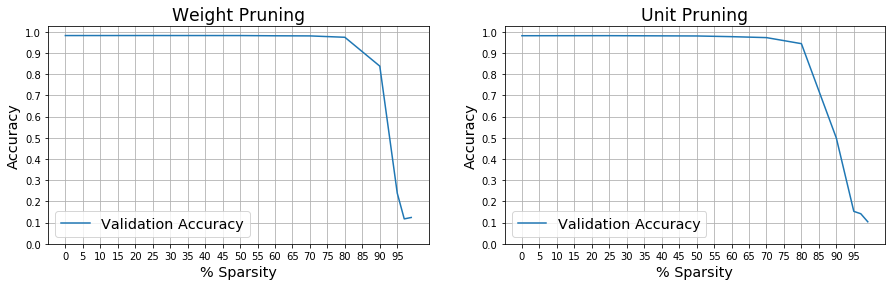

In [31]:
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(15)

plt.subplot(1, 2, 1)
plt.grid()
plt.plot(sparsity_percentage, weight_pruning_acc)
plt.xticks(np.arange(0, max(sparsity_percentage), 5))
plt.yticks(np.arange(0, max(weight_pruning_acc)+0.1, 0.1))
plt.xlabel("% Sparsity", fontsize='x-large')
plt.ylabel("Accuracy", fontsize='x-large')
plt.legend(["Validation Accuracy"], fontsize='x-large')
plt.title("Weight Pruning", fontsize='xx-large')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(sparsity_percentage, unit_pruning_acc)
plt.xticks(np.arange(0, max(sparsity_percentage), 5))
plt.yticks(np.arange(0, max(unit_pruning_acc)+0.1, 0.1))
plt.xlabel("% Sparsity", fontsize='x-large')
plt.ylabel("Accuracy", fontsize='x-large')
plt.legend(["Validation Accuracy"], fontsize='x-large')
plt.title("Unit Pruning", fontsize='xx-large')

plt.show()

The above plots show that both the strategies for pruning the neural network are efficient and have almost equal effect on the network. It can also be concluded that the network can be pruned by 70%~80% and still perform with the accuracy close to that of original unpruned neural network.

**Saving the  predictions to 'submission.csv'**

In [32]:
predictions={}
predictions["ImageId"] = pd.Series(range(1, 28001))
predictions["Label"] = y_pred

pd.DataFrame(predictions, columns=["ImageId",'Label']).to_csv('submission.csv', index=False)



**Conclusion : **
This notebook illustrates how to build a simple neural network from scratch using Tensorflow. Then it explores the possibility of pruning away the less important and redundant parameters (connections/ synapses) and units (neurons).

It can be seen that about 70~80% of the network does not contribute towards making predictions and hence even removing such a big part of network does not hurt it's performance. Both the pruning strategies are great and give quite similar results but it can be seen that 'Weight Pruning' has a slight edge over the 'Unit Pruning' method.

But one important point to note would be that even after setting 75% of units/weights to zero, there is no significant improvement in 'Time taken to predict on a sample input' as can be seen above in the notebook. This maybe because even though the weights/units are set to zero, they are still involved in the matrix multiplication operations i.e. setting a weight/unit to zero is not a good simulation of removing those weights/units.

**1. For Weight Pruning : ** maintain the parameters of a layer as a list of lists(of variable sizes) containing parameters (non-zero) associated with each unit in that layer and another list which keeps track of the features from the previous layer that this unit interacts with (this corresponds to non-zero entries of weight_pruned_parameters  (obtained as above). Thus the .(dot) product only occurs between parameters of a unit and certain features of previous layer (instead of all the features regardless of whether the corresponding connection weight is zero).

**2. For Unit Pruning : ** maintain the parameters of a layer as a list of lists(of same size, i.e. full connections) having only those rows that correspond to a non-zero unit in the unit_pruned_parameters as obtained above. This will reduce the size of weight matrix for each layer as redundant/insignificant units will be removed. This will help in improving the speed of forward_propagation through the network and hence the 'Time taken to predict on a sample input'.